In [52]:
# Sympy를 이용한 대수학에 대해 배운다

from sympy import Symbol

x = Symbol('x') # String으로 넣는 것 확인

print(type(x))
print(x + x + 1)
print(type(x + x + 1))

<class 'sympy.core.symbol.Symbol'>
2*x + 1
<class 'sympy.core.add.Add'>


In [53]:
a = Symbol('x')

print(a + a + 1)

# 아래와 같이 Symbol을 이용해 만든 클래스와 변수명이 다르면
# 혼동이 올 수 있으니, 동일하게 맞춰주자

2*x + 1


In [54]:
x = Symbol('x')

print(x.name)

# .name을 이용해 실제 이름을 확인할 수 있다

x


In [55]:
from sympy import Symbol

# 하나씩 생성할 땐 이렇게.
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')


from sympy import symbols

# 한꺼번에 생성할 땐 이렇게.
x,y,z = symbols('x,y,z')


# 몇가지 활용 예시
s = x*y + x*y
print(s)

p = x*(x + x)
print(p)

2*x*y
2*x**2


In [56]:
'''
factor() -> 주어진 함수를 인수로 쪼갬
expand() -> 주어진 함수를 확장형태로 표현함(항들의 합 형태)

Original Expression : x**2 - y**2
Factored Expression : (x - y)*(x + y)
Expanded Expression : x**2 - y**2
'''

from sympy import Symbol
x = Symbol('x')
y = Symbol('y')

from sympy import factor

expr = x**2 - y**2

print(factor(expr))


from sympy import expand

factors = factor(expr)

print(expand(factors))


# 또 다른 예시
print("\n또 다른 예시\n")

expr = x**3 + 3*x**2*y + 3*x*y**2 + y**3
factors = factor(expr)
print(factors)
print(expand(factors))

(x - y)*(x + y)
x**2 - y**2

또 다른 예시

(x + y)**3
x**3 + 3*x**2*y + 3*x*y**2 + y**3


In [57]:
'''
Pretty Printing

pprint()를 활용하면 흔히 쓰는 수식의 형태로 출력 함

Sympy printing 관련 문서
https://docs.sympy.org/latest/tutorials/intro-tutorial/printing.html
'''
from sympy import pprint

expr = x*x + 2*x*y + y*y

pprint(expr)

 2            2
y  + 2⋅x⋅y + x 


In [58]:
'''
Printing a Series


Print the series:
x + x**2 + x**3 + ... + x**n
    ____  _____  _____
      2     3      n

만들어 보기
'''

from sympy import Symbol, pprint, init_printing

def print_series(n):
    # Initialize printing system with reverse order
    # x의 차수가 놓은 것 부터 출력하는 것이 기본인데
    # 아래와 같이 설정해주면 역순으로 출력해 줌
    # 자세한 내용은 위의 공식 문서 참조
    init_printing(order="rev-lex")

    x = Symbol('x')
    series = x

    for i in range(2, n+1):
        series = series + (x**i) / i
    
    pprint(series)

# n = input('Enter the number of terms you want in the series: ')

print_series(int(7))

     2    3    4    5    6    7
    x    x    x    x    x    x 
x + ── + ── + ── + ── + ── + ──
    2    3    4    5    6    7 


In [59]:
'''
Substituting in Values
'''

x = Symbol('x')
y = Symbol('y')

expr = x*x + x*y + x*y + y*y

res = expr.subs({x:1, y:2})

pprint(expr)

print(res)

 2            2
y  + 2⋅x⋅y + x 
9


In [60]:
# 아래와 같은 응용도 가능하며
# 딕셔너리 형태로 값이 전달되는 부분 확인

pprint(expr.subs({x:1-y}))

       2                  2
(1 - y)  + 2⋅y⋅(1 - y) + y 


In [72]:
'''
simplify()를 활용한 프린팅 방법 확인 
및 지금까지 배운 출력과의 비교
'''

expr_subs = expr.subs({x:y-1})


print("factor()")
print(factor(expr_subs))
print("\n\n")

print("expand()")
print(expand(expr_subs))
print("\n\n")

print("pprint()")
pprint(expr_subs)
print("\n\n")

from sympy import simplify

print("simplify()")
simplify(expr_subs) # print로 출력되지 않음에 유의

factor()
(2*y - 1)**2



expand()
4*y**2 - 4*y + 1



pprint()
        2                   2
(-1 + y)  + 2⋅y⋅(-1 + y) + y 



simplify()


             2
1 - 4⋅y + 4⋅y 

In [1]:
'''
Print the series:
x + x**2 + x**3 + ... + x**n
    ____   _____       ______
     2       3            n

앞서 구현한 것을 조금 더 확장해
결과값 출력까지 진행해 보자
'''

from sympy import Symbol, pprint, init_printing

def print_series(n, x_value):

    init_printing(order="rev-lex")

    x = Symbol('x')
    series = x

    for i in range(2, n+1):
        series = series + (x**i) / i
    
    pprint(series)

    # Evaluate the series at x_value
    series_value = series.subs({x:x_value})
    print(f"Value of the series at {x_value}: {series_value}")

n = 7
x_value = 1

print_series(int(n), float(x_value))

     2    3    4    5    6    7
    x    x    x    x    x    x 
x + ── + ── + ── + ── + ── + ──
    2    3    4    5    6    7 
Value of the series at 1.0: 2.59285714285714


In [14]:
'''
simplify()를 활용한 두 수식의 곱 함수 작성
'''

from sympy import expand, sympify, simplify
from sympy.core.sympify import SympifyError

def product(expr1, expr2):
    prod = expand(expr1 * expr2)
    print(prod)
    

x = Symbol('x')
y = Symbol('y')

expr1 = x**2 + x*2 + x
expr2 = y**3 + y*3 + y

try:
    expr1 = sympify(expr1)
    expr2 = sympify(expr2)
except SympifyError:
    print("Invalid Input")
else:
    product(expr1, expr2)

x**2*y**3 + 4*x**2*y + 3*x*y**3 + 12*x*y


In [16]:
'''
Solving Equations

Using solve() function of sympy.

* solve() 쓸때, 작성된 수식의 반대편 항은 무조건 0으로 세팅해야함 *
'''

from sympy import Symbol, solve

x = Symbol('x')

expr = x - 5 - 7

solve(expr)

[12]

In [22]:
'''
Solving Quadratic Equations
'''

from sympy import solve

x = Symbol('x')

expr = x**2 + 5*x + 4

solve(expr, dict=True)
# dict 옵션을 활용하면, 좀 더 보기좋게 출력됨
# 해당 옵션 쓰지 않으면 그냥 리스트로 [-4, -1] 이라고 나옴

[{x: -4}, {x: -1}]

In [26]:
# 추가 예제

expr = x**2 + x + 1

solve(expr, dict=True)

⎡⎧     √3⋅ⅈ   1⎫  ⎧   √3⋅ⅈ   1⎫⎤
⎢⎨x: - ──── - ─⎬, ⎨x: ──── - ─⎬⎥
⎣⎩      2     2⎭  ⎩    2     2⎭⎦

In [28]:
# 추가 예제

x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')

expr = a*x**2 + b*x + c

solve(expr, x, dict=True)
# x에 대해 해를 찾는 것은 이와 같이 사용

⎡⎧        ____________    ⎫  ⎧      ____________    ⎫⎤
⎢⎪       ╱  2             ⎪  ⎪     ╱  2             ⎪⎥
⎢⎨   - ╲╱  b  - 4⋅a⋅c  - b⎬  ⎨   ╲╱  b  - 4⋅a⋅c  - b⎬⎥
⎢⎪x: ─────────────────────⎪, ⎪x: ───────────────────⎪⎥
⎣⎩            2⋅a         ⎭  ⎩           2⋅a        ⎭⎦

In [35]:
# 추가 예제
'''
a : 가속도
u : 초기 속도
t : 시간
s : 거리
'''

from sympy import Symbol, solve, pprint

s = Symbol('s')
u = Symbol('u')
t = Symbol('t')
a = Symbol('a')

expr = u*t + (1/2)*a*t**2 - s

t_expr = solve(expr, t, dict=True)

pprint(t_expr)

# 여기에 더해 subs() 사용하면, 답을 구할 수 있을 것이라 예상할 수 있다

⎡⎧                        ______________    ⎫  ⎧                      ________
⎢⎪                       ╱      2           ⎪  ⎪                     ╱      2 
⎢⎨   - 1.4142135623731⋅╲╱  0.5⋅u  + a⋅s  - u⎬  ⎨   1.4142135623731⋅╲╱  0.5⋅u  
⎢⎪t: ───────────────────────────────────────⎪, ⎪t: ───────────────────────────
⎣⎩                      a                   ⎭  ⎩                     a        

______    ⎫⎤
          ⎪⎥
+ a⋅s  - u⎬⎥
──────────⎪⎥
          ⎭⎦


In [37]:
'''
이차방정식의 근을 찾아보자
'''

expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12

# tuple로 값 넘겨주는 모습 확인
solve((expr1, expr2), dict=True)

[{x: 24/5, y: -6/5}]

In [42]:
'''
위의 x, y 값이 실제로 만족되는 값인지 확인해보자
'''

soln = solve((expr1, expr2), dict=True)

soln = soln[0]

expr1.subs({x:soln[x], y:soln[y]})
# expr1 수식에 대해 만족함을 확인

expr2.subs({x:soln[x], y:soln[y]})
# expr2 수식에 대해 만족함을 확인

0

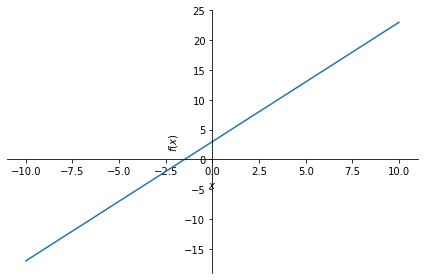

In [44]:
'''
Plotting Using sympy
'''

# 수식만 주고, 그래프 그리게 해보자
# (sympy 내부에서 matplotlib을 포크해서 쓰고 있음)
# (물론 사용방식 등은 다름, 코어 코드만 비슷하다고 이해하자)

from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')

plot(2*x + 3)

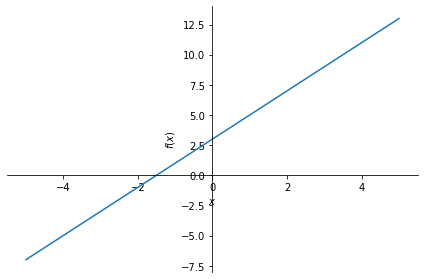

In [47]:
# 그래프 범위를 x축 기준 -5, 5 로 제한해보자

plot(2*x + 3, (x, -5 ,5))

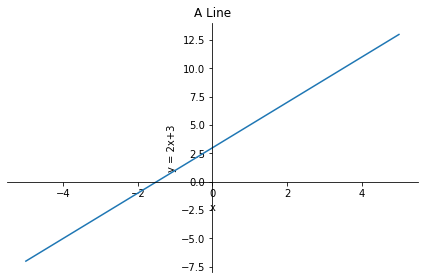

In [51]:
# 다양한 옵션을 지정해보자

plot((2*x + 3), (x, -5, 5), title="A Line", xlabel='x', ylabel="y = 2x+3")

In [53]:
# 로컬에 저장하기

# show 옵션을 False로 주면 그래프가 표기되지 않는데,
# 이는 찐 matplotlib과 다르게 기본값이 그냥 그래프 띄우는 거기때문.
# 어쨋든 이렇게 한 결과값을 변수에 할당하고 save() 함수 활용하면 로컬에 저장 가능
p = plot((2*x + 3), (x, -5, 5), title="A Line", xlabel='x', ylabel="y = 2x+3", show=False)

# p.save("LINE.png")